Chapter 20
# 有向图邻接矩阵
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

In [2]:
G = nx.DiGraph()
# 创建有向图的实例

In [3]:
G.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f'])
# 添加多个顶点

In [4]:
G.add_edges_from([('a','c'),('a','f'),
                  ('b','a'),('b','e'),
                  ('c','b'),('c','d'),
                  ('d','a'),('d','e'),
                  ('e','f'),('e','c'),
                  ('f','c'),('f','b')])

In [5]:
# 城市具体位置

pos = {'a':(50.6463,6.5692),
       'b':(70.3019,41.0777),
       'c':(35.6363,36.0673),
       'd':(6.8205,16.8171),
       'e':(26.1044,68.8277),
       'f':(59.1871,69.6398)}

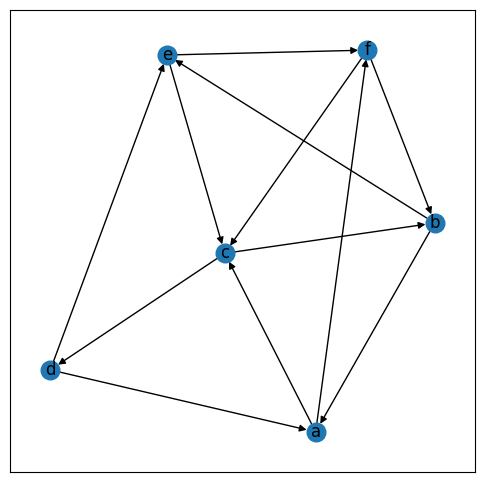

In [6]:

# 可视化
plt.figure(figsize = (6,6))
nx.draw_networkx(G, 
                 pos = pos,
                 node_size = 180)

In [7]:
# 邻接矩阵
A = nx.adjacency_matrix(G).todense()
A

array([[0, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 0]], dtype=int32)

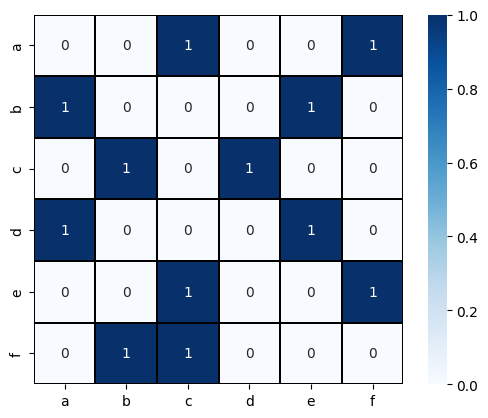

In [8]:
sns.heatmap(A, cmap = 'Blues', 
            annot = True, fmt = '.0f',
            xticklabels = list(G.nodes), 
            yticklabels = list(G.nodes),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('有向图邻接矩阵.svg')

In [40]:
A @ A

array([[0, 2, 1, 1, 0, 0],
       [0, 0, 2, 0, 0, 2],
       [2, 0, 0, 0, 2, 0],
       [0, 0, 2, 0, 0, 2],
       [0, 2, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 0]], dtype=int32)

In [41]:
A @ A @ A

array([[3, 1, 0, 1, 3, 0],
       [0, 4, 2, 2, 0, 0],
       [0, 0, 4, 0, 0, 4],
       [0, 4, 2, 2, 0, 0],
       [3, 1, 0, 1, 3, 0],
       [2, 0, 2, 0, 2, 2]], dtype=int32)

In [42]:
A @ A @ A @ A

array([[2, 0, 6, 0, 2, 6],
       [6, 2, 0, 2, 6, 0],
       [0, 8, 4, 4, 0, 0],
       [6, 2, 0, 2, 6, 0],
       [2, 0, 6, 0, 2, 6],
       [0, 4, 6, 2, 0, 4]], dtype=int32)

## 每行元素之和为1

In [34]:

T_T = A /  A.sum(axis=1)[:, np.newaxis]

In [35]:
T_T

array([[0. , 0. , 0.5, 0. , 0. , 0.5],
       [0.5, 0. , 0. , 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0.5, 0. ],
       [0. , 0. , 0.5, 0. , 0. , 0.5],
       [0. , 0.5, 0.5, 0. , 0. , 0. ]])

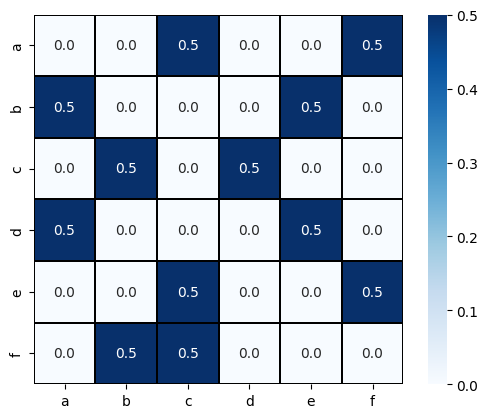

In [37]:
sns.heatmap(T_T, cmap = 'Blues', 
            annot = True, fmt = '.1f',
            xticklabels = list(G.nodes), 
            yticklabels = list(G.nodes),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('转移矩阵，每行元素之和为1.svg')

## 每列元素之和为1

In [45]:
A_T = A.T
T = A_T /  A_T.sum(axis=0)

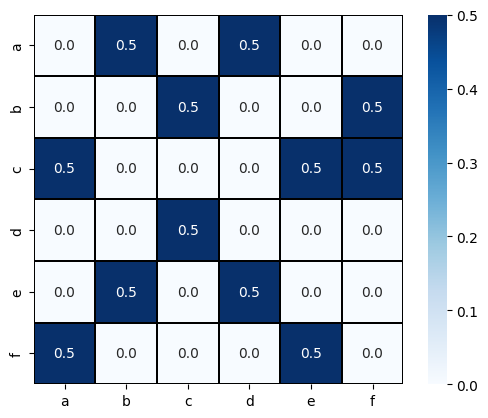

In [46]:
sns.heatmap(T, cmap = 'Blues', 
            annot = True, fmt = '.1f',
            xticklabels = list(G.nodes), 
            yticklabels = list(G.nodes),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('转移矩阵，每列元素之和为1.svg')

In [47]:
T @ T

array([[0.  , 0.  , 0.5 , 0.  , 0.  , 0.25],
       [0.5 , 0.  , 0.  , 0.  , 0.5 , 0.25],
       [0.25, 0.5 , 0.  , 0.5 , 0.25, 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.25, 0.25],
       [0.  , 0.  , 0.5 , 0.  , 0.  , 0.25],
       [0.  , 0.5 , 0.  , 0.5 , 0.  , 0.  ]])

In [48]:
T @ T @ T

array([[0.375, 0.   , 0.   , 0.   , 0.375, 0.25 ],
       [0.125, 0.5  , 0.   , 0.5  , 0.125, 0.   ],
       [0.   , 0.25 , 0.5  , 0.25 , 0.   , 0.25 ],
       [0.125, 0.25 , 0.   , 0.25 , 0.125, 0.   ],
       [0.375, 0.   , 0.   , 0.   , 0.375, 0.25 ],
       [0.   , 0.   , 0.5  , 0.   , 0.   , 0.25 ]])

In [49]:
T @ T @ T @ T

array([[0.125, 0.375, 0.   , 0.375, 0.125, 0.   ],
       [0.   , 0.125, 0.5  , 0.125, 0.   , 0.25 ],
       [0.375, 0.   , 0.25 , 0.   , 0.375, 0.375],
       [0.   , 0.125, 0.25 , 0.125, 0.   , 0.125],
       [0.125, 0.375, 0.   , 0.375, 0.125, 0.   ],
       [0.375, 0.   , 0.   , 0.   , 0.375, 0.25 ]])